In [2]:
import re
import os
import time
import random
import json
import requests
import gensim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [12]:
#import daily market cap data on 25 largest (American) Aerospace/Defense companies
stocks=pd.read_csv('aero_stock_mkt_cap',index_col=0)
stocks.index=pd.DatetimeIndex(stocks.index)

#import s&p500 to isolate movement in aerospace/defense sector
sp500=pd.read_csv('GSPC.csv',index_col=0)
sp500.index=pd.DatetimeIndex(sp500.index)
# stocks_mil['sp500']=sp500['Adj Close']

#fill weekends (and holidays) with the previous day's value
stocks.fillna(method='ffill',inplace=True)

#stocks became public during timeframe, would cause jumps in data
drop=['adj_'+st for st in ['TDG','HII','SPR','BWXT']]
stocks.drop(labels=drop, axis=1, inplace=True)

#fill first day bc im lazy 
stocks.fillna(method='bfill', inplace=True)

#convert stocks to $millions and aggregate
# stocks_mil=stocks/1000000
# stocks_mil.astype(int)
# stocks_mil['SUM']=stocks.sum(axis=1)

# #use s&p to isolate Aerospace/Defense movement
# stocks_mil['SUM_adj_sp']=stocks_mil['SUM']/stocks_mil['sp500']

#import Aero/Defense stock data on the daily returns
stock_ret_daily=pd.read_csv('Aero_returns',index_col=0)
stock_ret_daily.index=pd.DatetimeIndex(stock_ret_daily.index)
drop=['adj_'+st for st in ['TDG','HII','SPR','BWXT','SPCE','AVAV']]
stock_ret_daily.drop(labels=drop, axis=1, inplace=True)
stock_ret_daily.fillna(method='bfill',inplace=True)
stock_ret_daily['SUM']=stock_ret_daily.sum(axis=1)

In [34]:
def plt_szn(df,szn='A',size='l',title=0):
    """
    simple plot with time scaled precision
    size=l,m,s
    title=''
    szn=A,M,W
    """
    
    if (size=='l'):
        df.resample(szn).mean().plot(figsize=(15,10),linewidth=3.0)
        if title !=0:
            plt.xlabel(title,fontsize=20)
    elif (size=='m'):
        df.resample(szn).mean().plot(figsize=(10,7),linewidth=2.0)
        if title !=0:
            plt.xlabel(title,fontsize=15)
    elif (size=='s'):
        df.resample(szn).mean().plot(figsize=(7,5),linewidth=1.0)
        if title !=0:
            plt.xlabel(title,fontsize=10)
    else:
        print('wrong size')
    if title !=0:
        plt.xlabel(title,fontsize=15)
    plt.axhline(0, color='black')

In [5]:
def scifi_movies(df):
    df1=df.copy()
    movies=pd.read_csv('daily_scifi',index_col=1)
    movies.drop('Unnamed: 0', axis=1, inplace=True)
    movies.index=pd.DatetimeIndex(movies.index)
    df1=df1.join(movies['numscifi'], how='left', on=df1.index)
    df1.head()
    return df1['numscifi']

In [10]:
def add_nasa_budget(df):
    df1=df.copy()
    yearly_budget={2005:.63,
           2006:.57,
           2007:.58,
           2008:.6,
           2009:.57,
           2010:.52,
           2011:.51,
           2012:.50,
           2013:.49,
           2014:.5,
           2015:.49,
           2016:.5,
           2017:.47,
           2018:.5,
           2019:.47,
           2020:.48}
    sdate = df.index[0]   # start date
    edate = df.index[-1]   # end date
    delta = edate - sdate       # as timedelta
    days=[sdate + timedelta(days=i) for i in range(delta.days + 1)]
    df1['day']=days
    
    return df1['day'].apply(lambda u: yearly_budget[u.year])

In [13]:

features=pd.DataFrame(stonks['DIF'])
features['movies']=scifi_movies(features)
features['budget']=add_nasa_budget(features)
features.rename({'DIF':'Aero_Stocks','budget':'Nasa_Budget','movies':'SciFi_Movies'},axis=1,inplace=True)
features.to_csv('features')

NameError: name 'stonks' is not defined

In [253]:
features.head(20)

,Aero_Stocks,SciFi_Movies,Nasa_Budget
2005-04-10,NaN,1.0,0.63
2005-04-11,NaN,1.0,0.63
2005-04-12,-0.008813,1.0,0.63
2005-04-13,-0.000719,1.0,0.63
2005-04-14,-0.006624,1.0,0.63
2005-04-15,-0.012504,1.0,0.63
2005-04-16,0.000000,1.0,0.63
2005-04-17,0.000000,1.0,0.63
2005-04-18,0.004013,1.0,0.63
2005-04-19,0.002349,1.0,0.63


In [43]:
stocks_mil['SUM']=stocks.sum(axis=1)

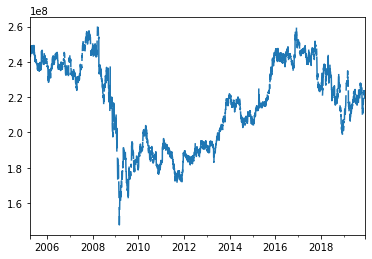

In [72]:
stocks_mil['SUM_adj_sp'].plot()

In [15]:
stock_ret_daily=pd.read_csv('Aero_returns',index_col=0)
stock_ret_daily.index=pd.DatetimeIndex(stock_ret_daily.index)
drop=['adj_'+st for st in ['TDG','HII','SPR','BWXT','SPCE','AVAV']]
stock_ret_daily.drop(labels=drop, axis=1, inplace=True)
stock_ret_daily.fillna(method='bfill',inplace=True)
stock_ret_daily['SUM']=stock_ret_daily.sum(axis=1)
stock_ret_daily['MEAN']=stock_ret_daily.mean(axis=1)

In [65]:
sp500=pd.read_csv('GSPC.csv',index_col=0)
sp500.index=pd.DatetimeIndex(sp500.index)
sp500['returns']=sp500['Adj Close'].pct_change()

In [66]:
stonks=pd.DataFrame(stock_ret_daily['MEAN'])
stonks=stonks.join(sp500['Adj Close'], how='left', on=stonks.index)

In [18]:
stonks=stonks.join(sp500['Adj Close'], how='left', on=stonks.index)

ValueError: columns overlap but no suffix specified: Index(['Adj Close'], dtype='object')

In [67]:
stonks['sp500']=stonks['Adj Close'].fillna(method='ffill').pct_change()

In [68]:
stonks.drop(labels='Adj Close', axis=1, inplace=True)

In [70]:
stonks['DIF']=stonks['MEAN']-stonks['sp500']

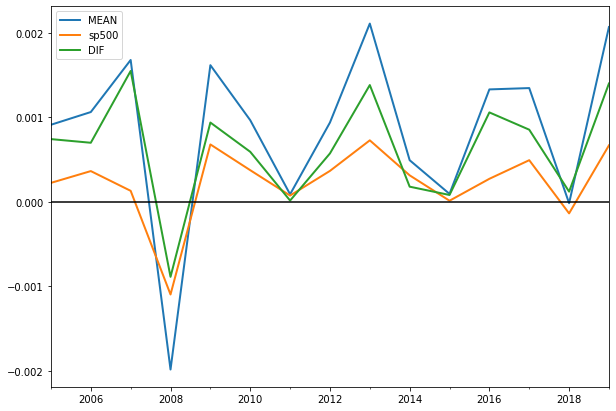

In [170]:
nasa_budget=pd.read_csv('yearly_budget',index_col=1)
nasa_budget.drop('Unnamed: 0', axis=1, inplace=True)
nasa_budget.index=pd.DatetimeIndex(nasa_budget.index)

In [1]:
plt_szn(nasa_budget,'M','s',title='Nasa Budget as % of Fed Budget')

NameError: name 'plt_szn' is not defined

In [22]:
features=pd.DataFrame(stock_ret_daily['MEAN'])

In [8]:
nasa=add_nasa_budget()

TypeError: add_nasa_budget() missing 1 required positional argument: 'df'

In [23]:
features['budget']=add_nasa_budget(features)

In [207]:
features.index[-1]

Timestamp('2019-12-02 00:00:00')

In [236]:
features.rename({'DIF':'Aero_Stocks','budget':'Nasa_Budget','movies':'SciFi_Movies'},axis=1,inplace=True)

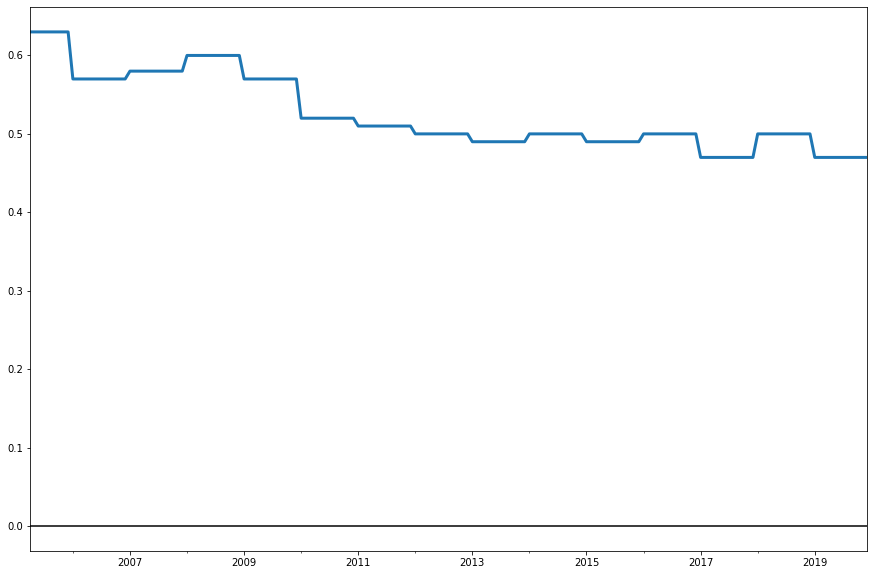

In [33]:
plt_szn(features['budget'],szn='M')

In [62]:
def plt_szn2(df,szn='A',size='l',title=0):
    """
    simple plot with time scaled precision
    size=l,m,s
    title=''
    szn=A,M,W
    """
    
    if (size=='l'):
        df.resample(szn).mean().plot(figsize=(15,10),linewidth=3.0)
        if title !=0:
            plt.title(title,fontsize=20)
    elif (size=='m'):
        df.resample(szn).mean().plot(figsize=(10,3),linewidth=2.0)
        if title !=0:
            plt.title(title,fontsize=15)
    elif (size=='s'):
        df.resample(szn).mean().plot(figsize=(7,5),linewidth=1.0)
        if title !=0:
            plt.title(title,fontsize=10)
    else:
        print('wrong size')
    if title !=0:
        plt.title(title,fontsize=15)
    plt.xlabel('Date')
    plt.ylabel('% Fed Budget')
    
    plt.axhline(0, color='black')

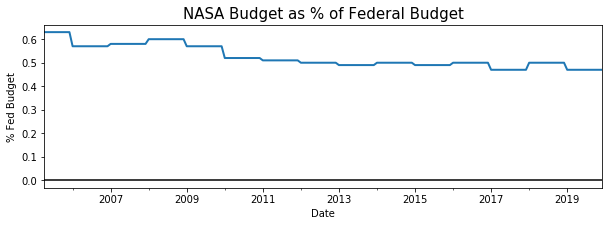

In [63]:
plt_szn2(features['budget'],szn='M',title='NASA Budget as % of Federal Budget',size='m')

In [160]:
def plt_szn_stonks(df,szn='A',size='l',title=0):
    """
    simple plot with time scaled precision
    size=l,m,s
    title=''
    szn=A,M,W
    """
    plt.rcParams.update({'font.size': 15})

    df1=df.resample(szn).mean()
    
#     plt.xlabel(title,fontsize=20)
    fig=plt.figure(figsize=(12,10))
    ax=plt.axes()
    ax.plot(df1['MEAN'],label='Aero Composite',
            color='firebrick',
           linewidth=2)
    ax.plot(df1['sp500'],label='S&P500',
            color='royalblue',
           linewidth=2)
    ax.plot(df1['DIF'],label='Industry Adj.',
            color='forestgreen',
           linewidth=2)
    
#     ax=df.resample(szn).mean().plot(figsize=(15,10),linewidth=3.0)
    ax.set_title(title,fontsize=20)
    ax.set_xlabel('Years', fontsize=18)
    ax.set_ylabel('AVG % Change', fontsize=16)
    
#     if title !=0:
#         .xlabel(title,fontsize=15)
    ax.grid()
    ax.axhline(0, color='black')
    ax.legend( prop={'size': 15})
    
    return plt.show()

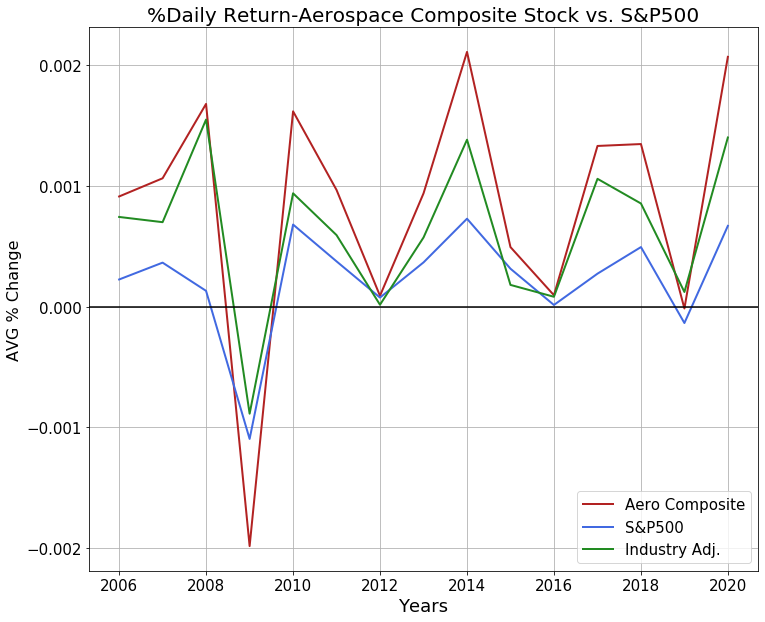

In [161]:
plt_szn_stonks(stonks,'A',size='m',title='%Daily Return-Aerospace Composite Stock vs. S&P500')